# CEE 498: Transportation Economics

## Assignment Two: Transit Pricing

Noah Garfinkle (garfink2@illinois.edu)

07 February 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize

# Problem 1

Demand for a transit service has the demand function

$$
Q\left(P\right)=e^{\alpha-\beta P}
$$

With $\alpha=3$, $\beta=0.6$.  Operating cost per ride is $c=0.8$.  Capacity costs $C=1$ per ride.


## Part a
What is the optimal capacity?  At the optimal capacity, what is the price, consumer surplus, and total social surplus?

Solving for the inverse demand function, we find that:
$$
Q\left(P\right)=e^{\alpha-\beta P}
$$
$$
\ln{\left(Q\right)}=\alpha-\beta P
$$
$$
\beta P=\alpha-\ln{\left(Q\right)}
$$
$$
\fbox{$P\left(Q\right)=\frac{\alpha-ln{\left(Q\right)}}{\beta}$}
$$


We begin by calculating the demand at the Long-Run Marginal Cost (SRMC), where $\fbox{$\ P=c+C=1.8$}$.

$$
Q\left(0.8\right)=e^{3-0.6\left(0.8\right)}=\fbox{$6.82$}
$$

Recall that consumer surplus for this demand function is
$$
CS\left(Q\right)={\int\ }_0^QP\left(q\right)dq-P\left(q\right)Q=\frac{Q\left(\alpha-\ln{\left(Q\right)}+1\right)}{\beta}-\frac{\alpha-\ln{\left(Q\right)}}{\beta}Q=\fbox{$\frac{Q}{\beta}$}
$$

Therefore,
$$
CS\left(6.82\right)=\frac{6.82}{0.6}=\fbox{$11.37$}
$$

We know that TR=TC, and therefore the consumer surplus is the total social surplus.

In [2]:
def Q(P,α=3.0,β=0.6,c=0.8,C=1.0):
    """ 
    Calculates quantity demanded for the exponential demand function. 
  
    Defaults and units per problem one
  
    Parameters: 
    P (float): Price 
    α (float): default of 3.0
    β (float): default of 0.6
    c (float): operating cost per ride, default of 0.8
    C (float): capacity cost, default is 1.0
  
    Returns: 
    int: Description of return value 
    """
    q = np.exp(α-β*P)
    return q

In [3]:
Ps = np.linspace(0,10,100)
Qs = [Q(P) for P in Ps]
α=3.0
β=0.6
c=0.8
C=1.0

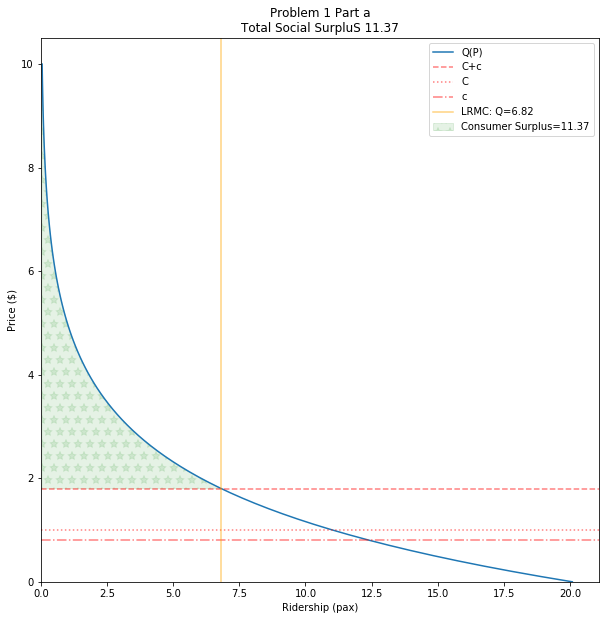

In [4]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c+C)
ax.axvline(Q_c,label=f"LRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, c+C, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')


# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social SurpluS {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


## Part b
Suppose that capacity can only be added in increments of five.  What capacity produces the highest total social surplus?  What is the price, consumer surplus, and profit or loss at this capacity?  Assume unlimited quantity is available.

Having already determined the global optimum, we can test $Q^\ast\pm\ 5$ to see which case results in the superior local optimum.

$$
TSS\left(Q\right)=\frac{Q}{\beta}+\frac{\alpha-\ln{\left(Q\right)}}{\beta}\ast Q-\left(c+C\right)\ast Q
$$

In [5]:
def TSS(Q,α=3.0,β=0.6,c=0.8,C=1.0):
    tss = (Q/β) + ((α-np.log(Q))/β)*Q - ((c+C)*Q)
    return tss

In [6]:
# Test by confirming for part A that TSS = CS
TSS(6.82)

11.368264003243953

In [7]:
TSS(5) # lower bound

10.921350729715833

In [8]:
TSS(10) # upper bound

10.290248450099234

Therefore, we should choose a capacity of Q^\ast=5, with consumer surplus of 
$$
\frac{5}{.6}=\fbox{$8.33$}
$$

And a profit of 
$$
\frac{3.0-\ln{\left(5\right)}}{.6}\ast5-\left(1.8\right)\ast5=\fbox{$2.59$}
$$

# Problem 2
Demand for a transit service is given by
$$
Q\left(P\right)=\alpha e^{-\beta P}
$$

With $\beta=0.4$, $\alpha=15$.  Total cost is given by

$$
TC\left(Q\right)=F+m_0q+m_1q^2
$$

Where $F=10$, $m_o=0.8$, $m_1=0.3$.


In [9]:
α=15.0
β=0.4
F=10.0
m0 = 0.8
m1 = 0.3

In [10]:
def Q(P,α=α,β=β):
    q = α*np.exp(-β*P)
    return q

## Part a
Derive functions of q for the following values.  Plot the functions in a Jupyter notebook for q from 0.1 to 10.  Submit the Jupyter notebook online.

### Subpart i) Inverse Demand

$$
Q\left(P\right)=\alpha e^{-\beta P}
$$
$$
\frac{Q}{\alpha}=e^{-\beta P}
$$
$$
\ln{\left(\frac{Q}{\alpha}\right)}=-\beta P
$$
$$
\fbox{$P\left(Q\right)=\frac{\ln{\left(Q\right)}-ln{\left(\alpha\right)}}{-\beta}$}
$$
$$
\fbox{$\fbox{$P\left(Q\right)=\frac{\ln{\left(\frac{\alpha}{Q}\right)}}{\beta}$}$}
$$

In [11]:
def P(Q,α=α,β=β):
    p = (np.log(Q)-np.log(α))/(-β)
    return p

In [12]:
def PSimplified(Q,α=α,β=β):
    p = np.log(α/Q)/β
    return p

In [13]:
Ps = np.linspace(0.1,10,100)
Qs = [Q(P) for P in Ps]

In [14]:
Qs_i = np.linspace(0.1,10,100)
Ps_i = [P(Q) for Q in Qs_i]

In [15]:
Ps_s = [PSimplified(Q) for Q in Qs_i]

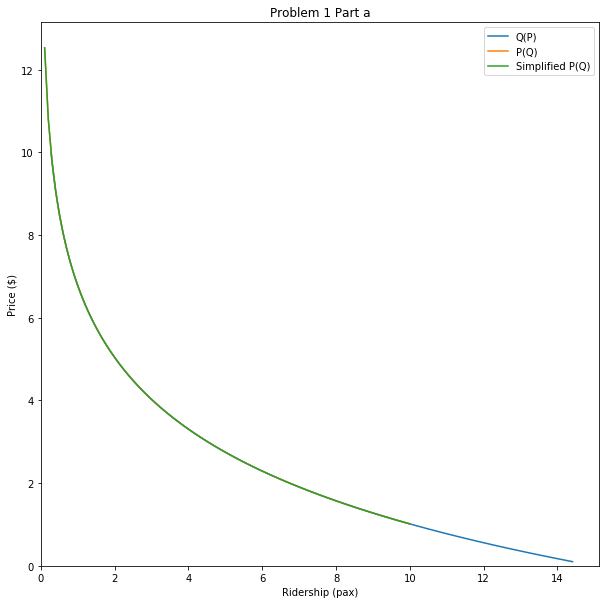

In [16]:
# the whole point of this graph is just to double check my math that all three demand curves are equivalent: staritng, inverse, and simplified inverse
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.plot(Qs_i,Ps_s,label="Simplified P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

### Subpart ii) Average Cost

Define the average cost curve AC as the total cost curve divided by the demand curve, TC/q
Given the total cost curve 
$$
TC\left(Q\right)=F+m_0q+m_1q^2
$$
$$
AC\left(q\right)=\frac{TC\left(q\right)}{q}=\frac{F+m_0q+m_1q^2}{q}=\fbox{$\frac{F}{q}+m_0+m_1q$}
$$

In [17]:
def AC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    ac = (F/Q) + m0 + m1*Q
    return ac

### Subpart iii) Marginal Cost

$$
\frac{\delta TC\left(q\right)}{\delta q}=\fbox{$m_0+2m_1q$}
$$

In [18]:
def MC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    mc = m0 + 2*m1*Q
    return mc

For clarity, each of these figures is plotted together

In [19]:
ACs = [AC(q) for q in Qs]
MCs = [MC(q) for q in Qs]

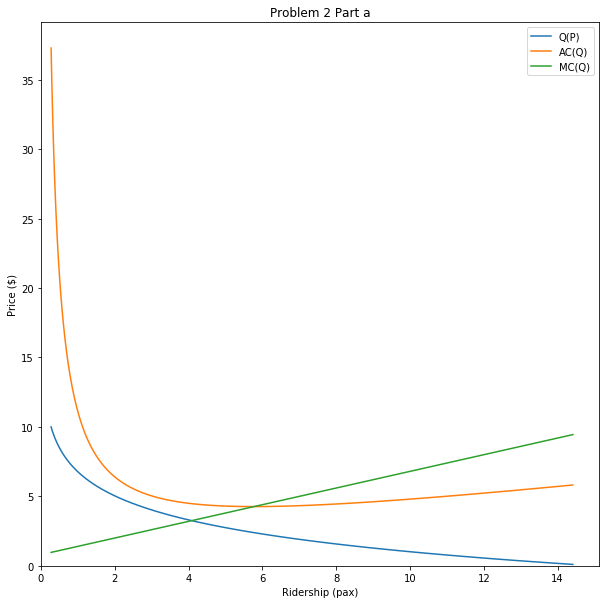

In [20]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demaand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 2 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Part b
At what quantity and price is total social surplus maximized?  Hint: Use the marginal cost pricing rule.

Per the marginal cost pricing rule, total social surplus is maximized with P=MC and therefore when the demand curve is intersected by the marginal cost curve.  This occurs when:
$$
\frac{\ln{\left(\frac{\alpha}{q}\right)}}{\beta}=m_0+2m_1q
$$
which can be simplified as 
$$
\ln{\left(\alpha\right)}-\ln{\left(q\right)}-\beta m_0-2\beta m_1q=0
$$

In [21]:
f = lambda q: np.log(α) - np.log(q) - β*m0 - 2*β*m1*q

In [22]:
ys = [f(q) for q in Qs]

In [23]:
res = root_scalar(f,x0=4,bracket=(3,5))
print(res)
print(res.root)
print(f(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 4.085677573993205
4.085677573993205
-5.551115123125783e-15


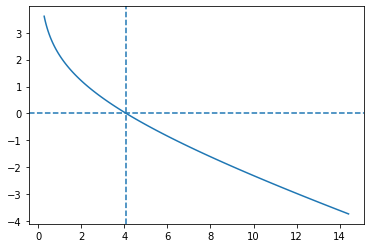

In [24]:
fig,ax = plt.subplots()
ax.plot(Qs,ys)
ax.axhline(0,ls='--')
ax.axvline(res.root,ls='--')

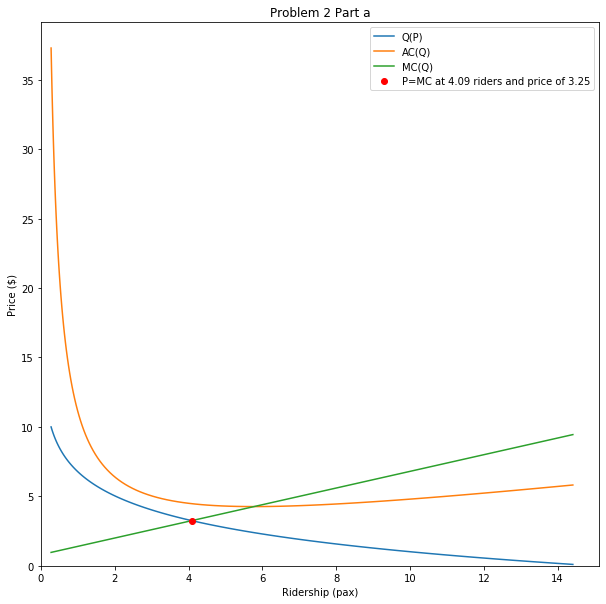

In [25]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demaand
ax.plot(Qs,Ps,label="Q(P)")
# ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 2 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")


# Plot the marginal price rule intersection
ax.plot(res.root,MC(res.root),'ro',label=f"P=MC at {res.root:,.2f} riders and price of {P(res.root):,.2f}")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Part c
When you plot the curves, you’ll notice that the demand curve is always below the average cost curve, so the service will lose money.  At what quantity and price are losses minimized?

Losses will be minimized when the average price curve $(\frac{F}{q}+m_0+m_1q)$ is minimized

In [26]:
f = lambda q: F/q + m0 + m1*q
res = minimize(lambda x: f(x[0]), x0=[5])
print(res)
print(res.x[0])

      fun: 4.264101615137761
 hess_inv: array([[9.59930498]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([5.77350233])
5.77350232555437


In [27]:
# find the price associated with this demand
p_intersect = P(res.x[0])

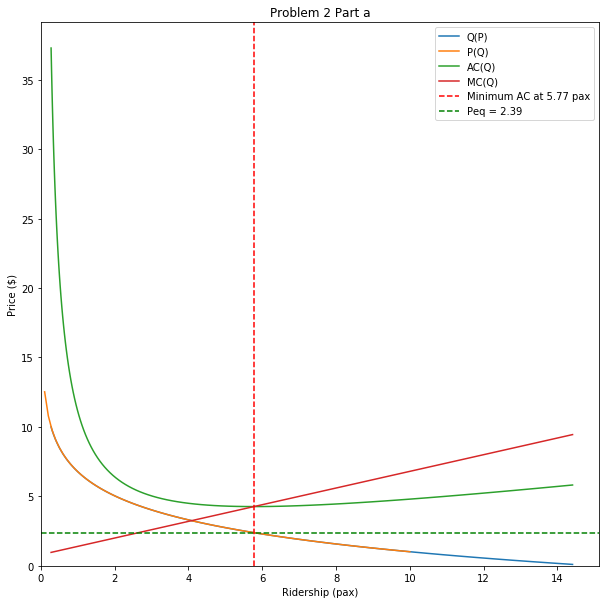

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demaand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 2 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")


# plot the minimization
ax.axvline(res.x[0],label=f"Minimum AC at {res.x[0]:,.2f} pax",ls="--",color="red")
ax.axhline(p_intersect,label=f"Peq = {p_intersect:,.2f}",ls="--",color="green")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Part d
You get a subsidy of 3 from the government.  At what prices and quantities can you break even?

We break even when TR=TC
$$
3+\frac{\ln{\left(\frac{\alpha}{q}\right)}}{\beta}q=F+m_0q+m_1q^2
$$
$$
3+\frac{\ln{\left(\frac{\alpha}{q}\right)}}{\beta}q\ -\ F\ -\ m_0q\ -\ m_1q^2=0
$$

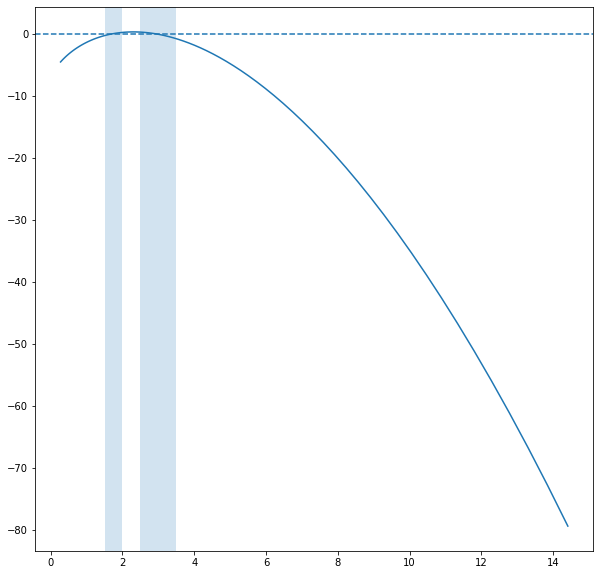

In [30]:
f = lambda q: 3 + (np.log(α/q)/β*q) - F - m0*q - m1*q*q
ys = [f(q) for q in Qs]
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Qs,ys)
ax.axhline(0,ls="--")
ax.axvspan(1.5,2,alpha=0.2)
ax.axvspan(2.5,3.5,alpha=0.2)

In [31]:
res_lower = root_scalar(f,x0=1.75,bracket=(1.5,2))
print(res_lower)
print(res_lower.root)
print(f(res_lower.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.676443605950277
1.676443605950277
2.4424906541753444e-15


In [32]:
res_upper = root_scalar(f,x0=3,bracket=(2.5,3.5))
print(res_upper)
print(res_upper.root)
print(f(res_upper.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 2.9723481253086397
2.9723481253086397
1.3322676295501878e-15


In [33]:
print(f"There are two possible subsidized break-even quantities found using the solver:\n{res_lower.root:,.2f} pax, which occurs at a price of {P(res_lower.root):,.2f}, and\n{res_upper.root:,.2f} pax, which occurs at a price of {P(res_upper.root):,.2f}")

There are two possible subsidized break-even quantities found using the solver:
1.68 pax, which occurs at a price of 5.48, and
2.97 pax, which occurs at a price of 4.05


# Problem 3

A rider’s demand function for subway rides, q, is
$$
q\left(p\right)=\theta e^{-\beta P}
$$

Where $\beta>0$, $p$ is the fare, and $\theta$ is a “taste parameter” measuring the intensity of demand.  If the price of an unlimited ride pass is $T$, what is the value of $\widetilde{\theta}$ such that everyone with $\theta<\widetilde{\theta}$ pays for the ride and everyone with $\theta>\widetilde{\theta}$ buys the pass?


We begin by solving for the inverse demand function
$$
q\left(p\right)=\theta e^{-\beta P}
$$
$$
\frac{q}{\theta}=e^{-\beta P}
$$
$$
\ln{\left(\frac{q}{\theta}\right)}=-\beta P
$$
$$
\ln{\left(q\right)}-\ln{\left(\theta\right)}=-\beta P
$$
$$
p\left(q\right)=\frac{\ln{\left(q\right)}-ln{\left(\theta\right)}}{-\beta}
$$

Alternatively, we can write
$$
p\left(q\right)=-\frac{\ln{\left(\frac{q}{\theta}\right)}}{\beta}=\fbox{$\frac{1}{\beta}\ln{\left(\frac{\theta}{q}\right)}$}\ 
$$

Per the course notes, an individual will buy the pass when their consumer surplus with the pass is greater than their consumer surplus without the pass, as expressed by
$$
S\left(P,\theta\right)<S\left(0,\theta\right)-T
$$
And therefore, we search for the value of $\widetilde{\theta}$ such that

$$
S\left(P,\widetilde{\theta}\right)=S\left(0,\widetilde{\theta}\right)-T
$$

We can replace $S(P,\theta)$ with the equation for consumer surplus,
$$
CS = \fbox{$\frac{q}{\beta}$}
$$

In [ ]:
θ=10
β=2

In [ ]:
def Q(P,θ=θ,β=β):
    q = θ*np.exp(-β*P)
    return q

In [ ]:
Ps = np.linspace(0,10,100)
Qs_pt5 = [Q(P,θ=0.5) for P in Ps]
Qs_1 = [Q(P,θ=1.0) for P in Ps]
Qs_1pt5 = [Q(P,θ=1.5) for P in Ps]
Qs_2 = [Q(P,θ=2.0) for P in Ps]

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs_pt5,Ps,label="Q(P,θ=0.5)")
ax.plot(Qs_1,Ps,label="Q(P,θ=1.0)")
ax.plot(Qs_1pt5,Ps,label="Q(P,θ=1.5)")
ax.plot(Qs_2,Ps,label="Q(P,θ=2.0)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

$$
\therefore CS\left(q\right)=\frac{q}{\beta}\left[\ln{\left(\frac{\theta}{q}\right)}+1-\ln{\left(\frac{\theta}{q}\right)}\right]=\fbox{$\fbox{$\frac{q}{\beta}$}$}
$$

# Problem 4

In [ ]:
α1 = 10
β1 = 0.35
c1 = 1.5
f1 = 4.0

α2 = 6
β2 = 0.45
c2 = 0.8
f2 = 3.3

In [ ]:
def Q(P,α,β):
    q = α*np.exp(-β*P)
    return q

# Problem 5

Per advice provided by during office hours, my approach is as follows:

Step 1: Find the values of price $p_1=p_2=p$, which satisfy the constraint optimality, such that $TR_1+TR_2=TC_1+TC_2$.

Step 2: Evaluate the total social surplus for any values of p which satisfy step one.  The intuition within this section is that the optimality constraint for total social surplus is already met with respect to revenue matching cost for the producer, and as such total social surplus will only arise from consumer surplus, which will be maximized at the lowest feasible price.


Reccall from problem four that
$$
TR=\frac{\ln{\left(\frac{\alpha}{q}\right)}}{\beta}q
$$

$$
TC=f_i+c_i (q_i )
$$

Substituting in the appropriate expressions for $q_i(p)$, and values for parameters,

$$
\frac{\ln{\left(\frac{10}{10e^{-.35P_1}}\right)}}{.35}\left(10e^{-.35P_1}\right)+\frac{\ln{\left(\frac{6}{6e^{-.45P_2}}\right)}}{.45}\left(6e^{-.45P_2}\right)-4-1.5\left(10e^{-.35P_1}\right)-3.3-0.8(6e^{-.45P_2})=0
$$

and we can solve for the case $P_1=P_2=P$

In [ ]:
f = lambda p: np.log(10/(10*np.exp(-.35*p)))/.35*10*np.exp(-.35*p) + np.log(6/(6*np.exp(-.45*p)))/.45*60*np.exp(-.45*p) - 4 - 1.5*10*np.exp(-.35*p) - 3.3 - 0.8*6*np.exp(-.45*p)

In [ ]:
Ps = np.linspace(0.1,20,100)

In [ ]:
ys = [f(p) for p in Ps]

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Ps,ys)
ax.axhline(0,ls="--")
ax.axvspan(0.2,0.6,alpha=0.2)
ax.axvspan(10,12,alpha=0.2)

In [ ]:
res_lower = root_scalar(f,x0=0.4,bracket=(0.2,0.6))
res_upper = root_scalar(f,x0=11,bracket=(10,12))

In [ ]:
print(f"Two intersects are found, at p={res_lower.root:,.2f} and at p={res_upper.root:,.2f}.")

Per our underlying intuition, we know that TSS is maximized at the lower price of 0.42 with a consumer surplus of
$$
CS=\frac{q}{\beta}
$$

We can then calculate the quantity demanded for each group and sum their consumer surpluses.

In [ ]:
q1 = Q(res_lower.root,α1,β1)
q2 = Q(res_lower.root,α2,β2)
cs1 = q1 / β1
cs2 = q2 / β2

In [ ]:
print(f"The total consumer surplus is {cs1+cs2:,.2f}")
print(f"Ridership on line one is {q1:,.2f}, resulting in a consumer surplus of {cs1:,.2f}")
print(f"Ridership on line two is {q2:,.2f}, resulting in a consumer surplus of {cs2:,.2f}")